In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/appdata10/appdata10.csv
/kaggle/input/appdata10/top_screens.csv


# EDA

In [2]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import time
import pickle

In [3]:
pd.set_option('display.max_columns', 12)
pd.set_option('display.width', 1000)

In [4]:
df = pd.read_csv('/kaggle/input/appdata10/appdata10.csv')
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [6]:
df.isna().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [7]:
df["hour"] = df.hour.str.slice(1, 3).astype(int)

In [8]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [9]:
df_2 = df.copy().drop(columns = ['user', 'screen_list', 'enrolled_date',
                                           'first_open', 'enrolled'])
df_2.shape

(50000, 7)

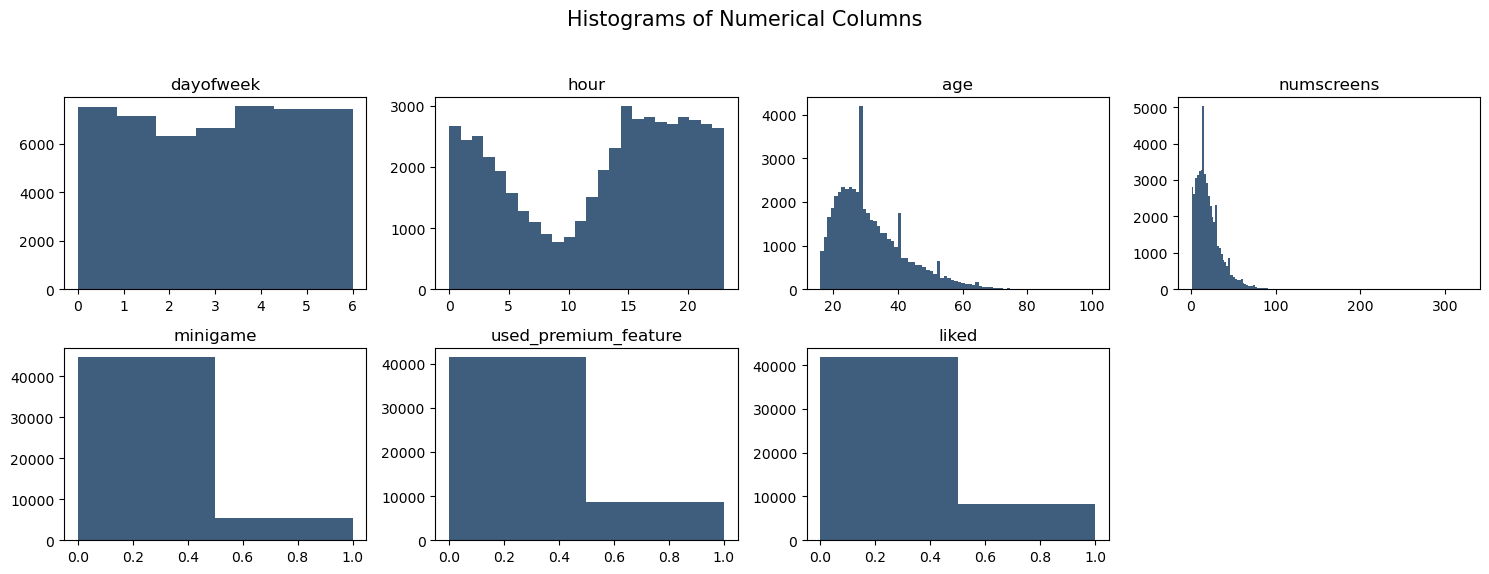

In [10]:
f = plt.figure(figsize=(15,6))
f.suptitle('Histograms of Numerical Columns', fontsize=15)

for i in range(1, df_2.shape[1] + 1):    
    plt.subplot(2, 4, i)
    #get current plot axes
    f = plt.gca()
#     f.axes.get_yaxis().set_visible(False)
    #set column name as title
    f.set_title(df_2.columns.values[i - 1])

    vals = np.size(df_2.iloc[:, i - 1].unique())
    
    plt.hist(df_2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('app_data_hist.jpg')

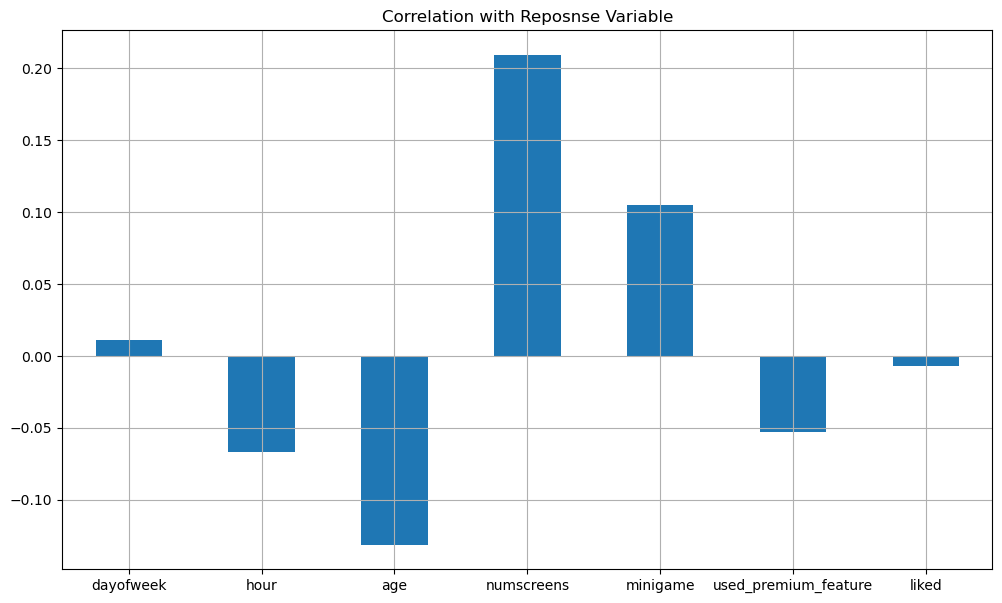

In [11]:
df_2.corrwith(df.enrolled).plot.bar(figsize=(12, 7),
                  title = 'Correlation with Reposnse Variable',
                  fontsize = 10, rot = 0,
                  grid = True)
plt.savefig('/kaggle/working/app_data_corr.jpg')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


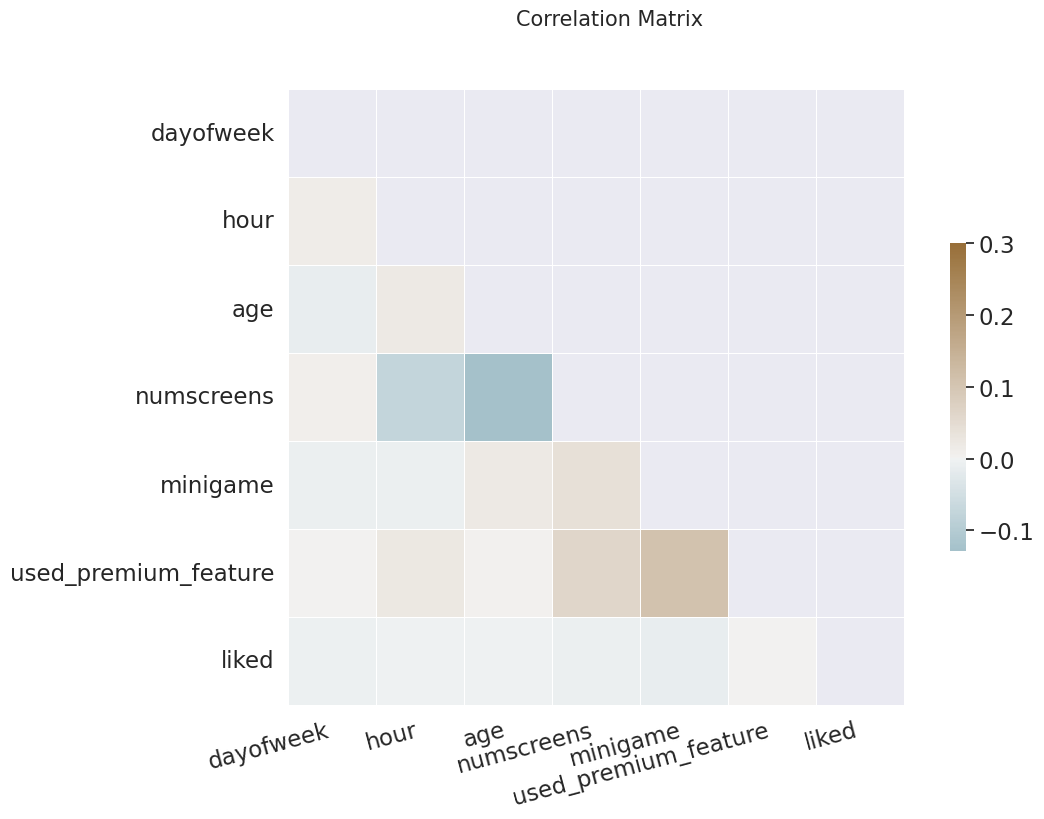

In [12]:
## Correlation Matrix
sn.set(style="dark", font_scale=1.5)

# Compute the correlation matrix
corr = df_2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool) #return a zero array with same size as corr
#set upper triangle as 0
mask[np.triu_indices_from(mask)] = True #Return the indices for the upper-triangle of arr

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))
f.suptitle("Correlation Matrix", fontsize = 15)

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 50, n=12, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
hmap = sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
hmap.set_xticklabels(hmap.get_xticklabels(), rotation=15, horizontalalignment='right')
plt.savefig('app_data_corr_matrix.jpg')

In [13]:
df["first_open"] = [parser.parse(row_date) for row_date in df["first_open"]]

df["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in df["enrolled_date"]]

In [14]:
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [15]:
df["difference"] = (df.enrolled_date - df.first_open).astype('timedelta64[h]')

In [16]:
df.head(3)

,user,first_open,dayofweek,hour,age,screen_list,...,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",...,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",...,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",...,0,1,0,NaT,1,NaN


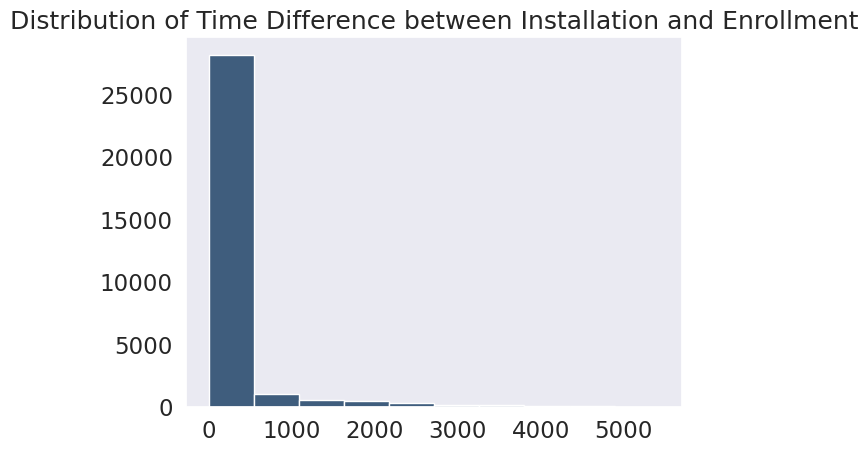

In [17]:
response_hist = plt.hist(df["difference"].dropna(), color='#3F5D7D')
plt.title('Distribution of Time Difference between Installation and Enrollment')
plt.show()

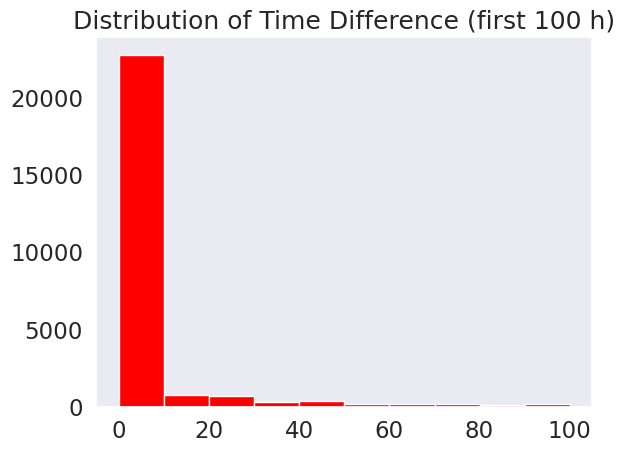

In [18]:
response_hist = plt.hist(df["difference"].dropna(), color='red', range = [0, 100])
plt.title('Distribution of Time Difference (first 100 h)')
plt.show()

In [19]:
df.loc[df.difference > 48, 'enrolled'] = 0
df = df.drop(columns=['enrolled_date', 'difference', 'first_open'])

In [20]:
df.head(3)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1


In [21]:
df_screen = pd.read_csv("/kaggle/input/appdata10/top_screens.csv").top_screens.values
df_screen

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [22]:
# Mapping Screens to Fields
df["screen_list"] = df.screen_list.astype(str) + ','
for sc in df_screen:
    df[sc] = df.screen_list.str.contains(sc).astype(int)
    df['screen_list'] = df.screen_list.str.replace(sc+",", "")

In [23]:
df.head()

,user,dayofweek,hour,age,screen_list,numscreens,...,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,...,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,...,0,0,0,0,0,0
2,254414,1,19,23,,3,...,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,...,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,...,0,0,0,0,0,0


In [24]:
df['Other'] = df.screen_list.str.count(",")
df = df.drop(columns=['screen_list'])

In [25]:
df.shape

(50000, 68)

In [26]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
df["SavingCount"] = df[savings_screens].sum(axis=1)
df = df.drop(columns=savings_screens)

In [27]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
df["CMCount"] = df[cm_screens].sum(axis=1)
df = df.drop(columns=cm_screens)

In [28]:
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
df["LoansCount"] = df[loan_screens].sum(axis=1)
df = df.drop(columns=loan_screens)

In [29]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,...,NetworkFailure,ListPicker,Other,SavingCount,CMCount,LoansCount
0,235136,3,2,23,15,0,...,0,0,7,0,0,1
1,333588,6,1,24,13,0,...,0,0,5,0,0,1
2,254414,1,19,23,3,0,...,0,0,0,0,0,1
3,234192,4,16,28,40,0,...,0,0,6,0,3,1
4,51549,1,18,31,32,0,...,0,0,10,0,2,1


In [30]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame', 'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions', 'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen', 'CC1Category', 'Splash', 'CC1', 'RewardsContainer', 'EditProfile', 'Finances', 'CC3', 'Alerts', 'Leaderboard', 'VerifyMobile', 'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation', 'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome', 'VerifyIncomeType', 'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker', 'Other', 'SavingCount', 'CMCount', 'LoansCount'], dtype='object')

In [31]:
df.to_csv('/kaggle/working/new_appdata10.csv', index = False)

# Training model

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [33]:
df_load = pd.read_csv("/kaggle/working/new_appdata10.csv")
df_load.shape

(50000, 52)

In [34]:
response = df_load["enrolled"]
df_load = df_load.drop(columns=["enrolled"])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_load, response,
                                                    test_size = 0.2,
                                                    random_state = 0)
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (40000, 51)
Shape of y_train:  (40000,)
Shape of X_test:  (10000, 51)
Shape of y_test:  (10000,)


In [36]:
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 20330 to 2732
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   dayofweek                40000 non-null  int64
 1   hour                     40000 non-null  int64
 2   age                      40000 non-null  int64
 3   numscreens               40000 non-null  int64
 4   minigame                 40000 non-null  int64
 5   used_premium_feature     40000 non-null  int64
 6   liked                    40000 non-null  int64
 7   location                 40000 non-null  int64
 8   Institutions             40000 non-null  int64
 9   VerifyPhone              40000 non-null  int64
 10  BankVerification         40000 non-null  int64
 11  VerifyDateOfBirth        40000 non-null  int64
 12  ProfilePage              40000 non-null  int64
 13  VerifyCountry            40000 non-null  int64
 14  Cycle                    40000 non-null  int64
 15 

In [38]:
sc_X = StandardScaler()
X_train_new = pd.DataFrame(sc_X.fit_transform(X_train)) #fit_transform return numpy array
X_test_new = pd.DataFrame(sc_X.transform(X_test)) #fit_transform lose column name and index
X_train_new.columns = X_train.columns.values
X_test_new.columns = X_test.columns.values
X_train_new.index = X_train.index.values
X_test_new.index = X_test.index.values
X_train = X_train_new
X_test = X_test_new

In [39]:
X_train.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,...,NetworkFailure,ListPicker,Other,SavingCount,CMCount,LoansCount
20330,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,...,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,1.785389
17532,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,...,-0.091207,-0.087221,1.839740,-0.260877,0.057524,0.309800
45819,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,...,-0.091207,-0.087221,1.025092,-0.260877,0.878421,1.785389
34807,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,...,-0.091207,-0.087221,1.025092,-0.260877,-0.763372,0.309800
31888,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,...,-0.091207,-0.087221,-0.875753,-0.260877,0.878421,-1.165789


In [40]:
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [41]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [42]:
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_results'] = y_pred
final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1


In [43]:
cm = confusion_matrix(y_test, y_pred)
print("accuracy_socre: ",accuracy_score(y_test, y_pred)*100,'%' )
print("precision_score: ",precision_score(y_test, y_pred)*100,'%') 
print("recall_score: ",recall_score(y_test, y_pred)*100,'%') 
print("f1_score: ",f1_score(y_test, y_pred)*100,'%')

accuracy_socre:  76.79 %
precision_score:  76.15894039735099 %
recall_score:  77.00892857142857 %
f1_score:  76.58157602663707 %


Test Data Accuracy: 0.7679


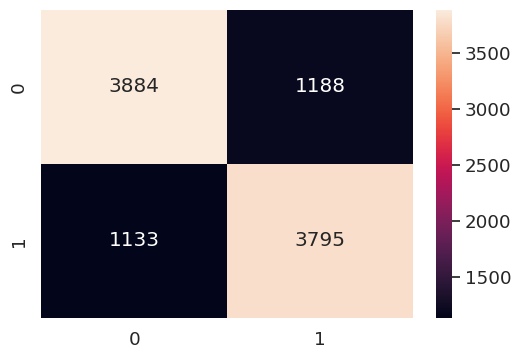

In [44]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (6, 4))
sn.set(font_scale=1.2)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [45]:
accuracies = cross_val_score(estimator= classifier, X= X_train, y = y_train, cv = 10)

In [46]:
print("Cross Validation Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Cross Validation Accuracy: 0.767 (+/- 0.009)
